In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
df = pd.read_csv(r'/content/Stunting_Dataset-mater.csv')

In [ ]:
df.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


In [ ]:
df.describe()

,Age,Birth Weight,Birth Length,Body Weight,Body Length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,14.255000,2.757600,49.117400,7.631990,68.85492
std,7.923285,0.291092,0.439814,1.720461,8.90664
min,6.000000,2.000000,48.000000,2.900000,49.00000
25%,10.000000,2.800000,49.000000,6.400000,65.00000
50%,13.000000,2.800000,49.000000,7.700000,68.30000
75%,15.000000,2.900000,49.000000,9.000000,72.20000
max,48.000000,3.100000,50.000000,10.500000,92.70000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [ ]:
df.columns

Index(['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight',
       'Body Length', 'Breastfeeding', 'Stunting'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Breastfeeding'])

In [ ]:
df = df.rename(columns={
    'Gender': 'Jenis Kelamin',
    'Age': 'Umur',
    'Birth Weight': 'Berat Lahir',
    'Birth Length': 'Tinggi Lahir',
    'Body Weight' : 'Berat Badan',
    'Body Length' : 'Tinggi Badan',
    'Stunting' : 'Status Stunting',
})

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace({
    'Female': 'Perempuan',
    'Male': 'Laki-Laki'
})

df['Status Stunting'] = df['Status Stunting'].replace({
    'No': 'Tidak Stunting',
    'Yes': 'Stunting'
})

In [ ]:
df.head()

,Jenis Kelamin,Umur,Berat Lahir,Tinggi Lahir,Berat Badan,Tinggi Badan,Status Stunting
0,Laki-Laki,17,3.0,49,10.0,72.2,Tidak Stunting
1,Perempuan,11,2.9,49,2.9,65.0,Stunting
2,Laki-Laki,16,2.9,49,8.5,72.2,Stunting
3,Laki-Laki,31,2.8,49,6.4,63.0,Stunting
4,Laki-Laki,15,3.1,49,10.5,49.0,Stunting


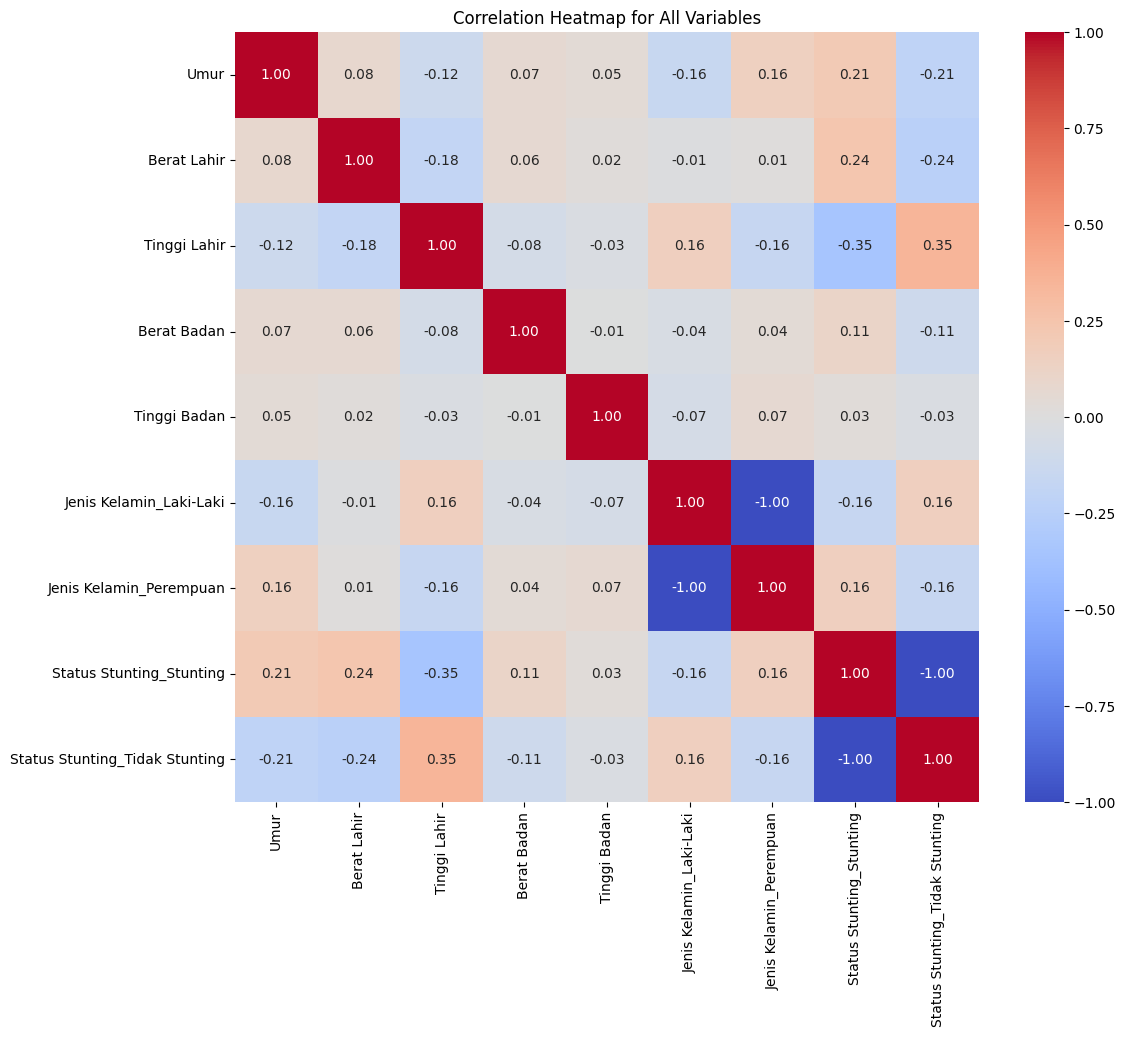

In [ ]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df.select_dtypes(include=['object']))

# Concatenate numerical and encoded categorical variables
df_combined = pd.concat([df_numerical, df_encoded], axis=1)

# Create a heatmap for all variables
correlation_matrix_combined = df_combined.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for All Variables')
plt.show()

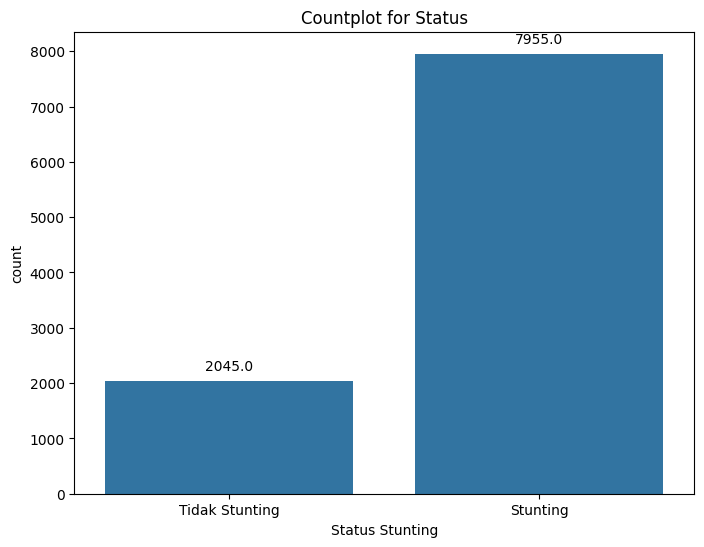

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Status Stunting', data=df)

# Add count annotations on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Countplot for Status')
plt.show()

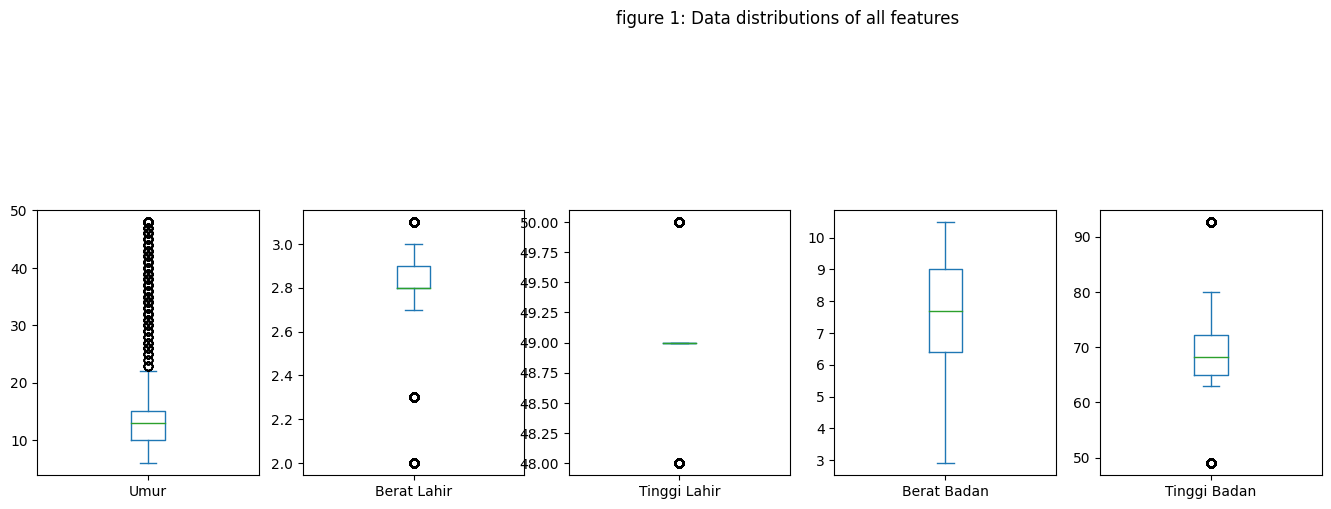

In [ ]:
# Menampilkan Boxplot untuk melihat adanya Outlayer
ax = df.plot(
  kind='box',
  subplots=True,
  layout=(5, 6),
  sharex=False,
  figsize=(20, 20),
  title='figure 1: Data distributions of all features'
)

plt.show()

In [ ]:
category_counts = df['Status Stunting'].value_counts()
category_counts

Status Stunting
Stunting          7955
Tidak Stunting    2045
Name: count, dtype: int64

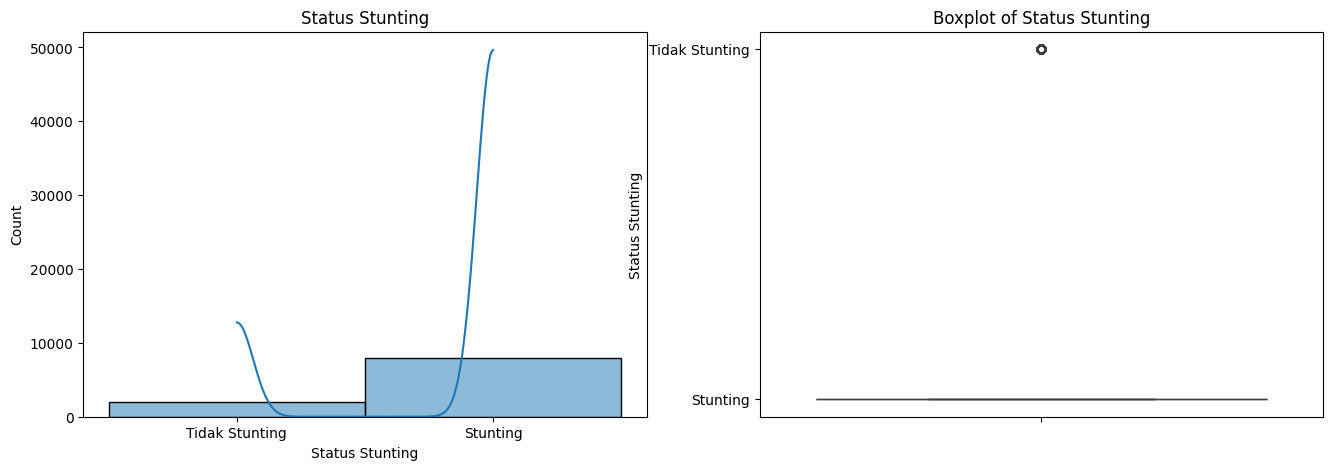

In [ ]:
# Check the distribution of "Observation_Value" with a distplot and boxplot using seaborn and matplotlib
plt.figure(figsize=(16, 5))

# Distribution plot
plt.subplot(121)
sns.histplot(df['Status Stunting'], kde=True)
plt.title('Status Stunting')

# Box plot
plt.subplot(122)
sns.boxplot(y=df['Status Stunting'])
plt.title('Boxplot of Status Stunting')

plt.show()

In [ ]:
# mengkodekan jenis kelamin
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'Laki-Laki': 0, 'Perempuan': 1})

# mengkodekan status gizi
df['Status Stunting'] = df['Status Stunting'].map({'Tidak Stunting': 0, 'Stunting': 1})
df

,Jenis Kelamin,Umur,Berat Lahir,Tinggi Lahir,Berat Badan,Tinggi Badan,Status Stunting
0,0,17,3.0,49,10.0,72.2,0
1,1,11,2.9,49,2.9,65.0,1
2,0,16,2.9,49,8.5,72.2,1
3,0,31,2.8,49,6.4,63.0,1
4,0,15,3.1,49,10.5,49.0,1
...,...,...,...,...,...,...,...
9995,0,15,3.0,49,9.0,63.0,1
9996,1,12,2.8,48,7.7,63.0,0
9997,0,16,2.8,49,7.7,49.0,0
9998,0,14,2.8,49,10.0,69.0,1


In [ ]:
from sklearn.model_selection import train_test_split

# memisahkan fitur dan target
X = df.iloc[:, 1:6]
X = df.drop('Status Stunting', axis=1)
y = df['Status Stunting']

# membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X

,Jenis Kelamin,Umur,Berat Lahir,Tinggi Lahir,Berat Badan,Tinggi Badan
0,0,17,3.0,49,10.0,72.2
1,1,11,2.9,49,2.9,65.0
2,0,16,2.9,49,8.5,72.2
3,0,31,2.8,49,6.4,63.0
4,0,15,3.1,49,10.5,49.0
...,...,...,...,...,...,...
9995,0,15,3.0,49,9.0,63.0
9996,1,12,2.8,48,7.7,63.0
9997,0,16,2.8,49,7.7,49.0
9998,0,14,2.8,49,10.0,69.0


In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Anda bisa mengubah jumlah tetangga (k)

In [ ]:
# Melatih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Prediksi dengan data test
y_pred = knn.predict(X_test)

In [ ]:
# Menghitung akurasi
train_accuracy = knn.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.893625
Test Accuracy: 0.825


In [ ]:
# Menampilkan laporan klasifikasi dan matriks kebingungan
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.48      0.53       407
           1       0.87      0.91      0.89      1593

    accuracy                           0.82      2000
   macro avg       0.73      0.70      0.71      2000
weighted avg       0.81      0.82      0.82      2000

Confusion Matrix:
[[ 197  210]
 [ 140 1453]]


In [ ]:
# test predict model
test = pd.DataFrame({'Jenis Kelamin': [0], 'Umur': [7], 'Berat Lahir': [2.3], 'Tinggi Lahir': [50], 'Berat Badan': [6.4], 'Tinggi Badan': [68.3]})

pred = knn.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

Predicted Score = [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Export the model
# import joblib

# joblib.dump(knn, 'knn_stunting.model')